### explore_tips

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

seed = 123
import seaborn as sns

df = sns.load_dataset('tips')

In [69]:
df.shape

(244, 7)

In [70]:
def peekatdata(df):
    print("\n \n SHAPE:")
    print(df.shape)

    print("\n \n COLS:")
    print(df.columns)

    print("\n \n INFO:")
    print(df.info())

    print("\n \n Missing Values:")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())

    print("\n \n DESCRIBE:")
    print(df.describe())

    print('\n \n HEAD:')
    print(df.head(5))

    print('\n \n TAIL:' )
    print(df.tail(5))

peekatdata(df)


 
 SHAPE:
(244, 7)

 
 COLS:
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB
None

 
 Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

 
 DESCRIBE:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%

In [71]:
# train, test = train_test_split(df, random_state = seed)

In [72]:
# num_vars = list(train.select_dtypes('number').columns)
# print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[:-1]))

In [73]:
# scaler = MinMaxScaler()
# train[num_vars] = scaler.fit_transform(train[num_vars])
# test[num_vars] = scaler.transform(test[num_vars])
# print(train.describe())
# print(test.describe())

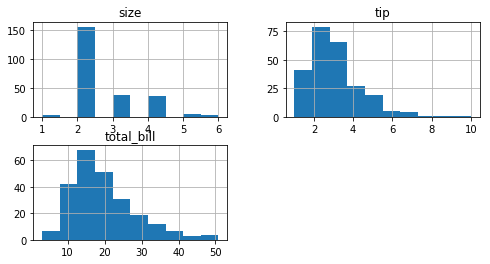

In [74]:
df.hist(figsize=(8,4), bins=10, log=False)
plt.show()

In [75]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Perform at least 1 t-test and 1 chi square test.

In [77]:
# df.sex.value_counts()

Binning into categorical for testing

In [78]:
# train['total_bill_bins'] = pd.qcut(train['total_bill'], 4, labels=False)
# train['total_bill_bins'].value_counts()

Perform at least 1 t-test and 1 chi square test.

In [79]:
pd.crosstab(df["sex"], df["smoker"], margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [80]:
tbl = pd.crosstab(df["sex"], df["smoker"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Independent (fail to reject H0)
0.925417020494423


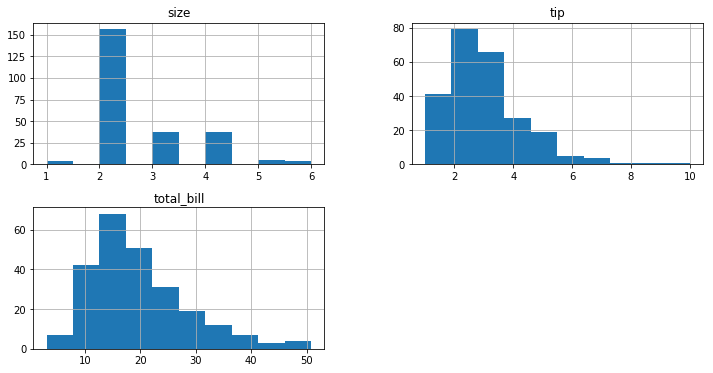

In [88]:
df.hist(figsize=(12,6))
plt.show()

In [89]:
scaler = StandardScaler()
df[['size','tip','total_bill']] = scaler.fit_transform(df[['size','tip','total_bill']])
df[['size','tip','total_bill']] = scaler.transform(df[['size','tip','total_bill']])
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    -2.227106   -2.171407   -2.707344
std      0.112791    0.725706    1.055741
min     -2.438893   -3.219487   -4.449713
25%     -2.308679   -2.694996   -3.339692
50%     -2.252330   -2.222953   -3.339692
75%     -2.172099   -1.875478   -2.229671
max     -1.834039    1.500936    1.100394


Binning using pd.qcut

In [90]:
df['tip'] = pd.qcut(df['tip'], 4, labels=False)
df['tip'].value_counts()

0    78
3    61
2    61
1    44
Name: tip, dtype: int64

chi squared test

In [91]:
tbl = pd.crosstab(df["sex"], df["tip"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Independent (fail to reject H0)
0.5524010015985761


pearson's r

In [113]:
r, pval = stats.pearsonr(df.total_bill, df.tip)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.5922085583049796, P-Value: 1.7333208106352066e-24


t-test

In [109]:
stats.ttest_ind(
    df[df.smoker == 'Yes'].total_bill.dropna(),
    df[df.smoker == 'No'].total_bill.dropna())

Ttest_indResult(statistic=1.3384363834700452, pvalue=0.18201032884301208)

another X^2 test: using two other categorical variables

In [111]:
tbl = pd.crosstab(df["smoker"], df["day"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
1.0567572499836523e-05


pearson's r

In [115]:
r, pval = stats.pearsonr(df.total_bill, df.tip)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.5922085583049796, P-Value: 1.7333208106352066e-24


t-test

In [119]:
stats.ttest_ind(
    df[df.time == 'Lunch'].tip.dropna(),
    df[df.time == 'Dinner'].tip.dropna())

Ttest_indResult(statistic=-2.4796412815598883, pvalue=0.013833228776615676)